# Exploration of some data from FB surveys
University of Maryland and Facebook have conducted surveys online. Respondents are asked for several COVID-19 related information, including symptoms, behaviors and so on.  
The full database and documentation is available [here](https://gisumd.github.io/COVID-19-API-Documentation/)

In [2]:
import pandas as pd
import numpy as np
import datetime as DT
import requests
import json 

from matplotlib import pyplot as plt

%matplotlib inline  
#widget

## An example: mask wearing trends
Let's have a look at Italy, France and Netherlands and their mask wearing habits

### Smoothed data

In [3]:
response = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=smoothed&country=Italy&daterange=20200423-20210720").text
response1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=smoothed&country=France&daterange=20200423-20210720").text
response2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=smoothed&country=Netherlands&daterange=20200423-20210720").text

jsonData = json.loads(response)
jsonData1 = json.loads(response1)
jsonData2 = json.loads(response2)

df_IT = pd.DataFrame.from_dict(jsonData['data'])
df_FR = pd.DataFrame.from_dict(jsonData1['data'])
df_NL = pd.DataFrame.from_dict(jsonData2['data'])


In [4]:
df_IT["survey_date"] = pd.to_datetime(df_IT['survey_date'])
df_FR["survey_date"] = pd.to_datetime(df_FR['survey_date'])
df_NL["survey_date"] = pd.to_datetime(df_NL['survey_date'])

In [5]:
#df_IT

Text(0, 0.5, '% responders wearing masks in public')

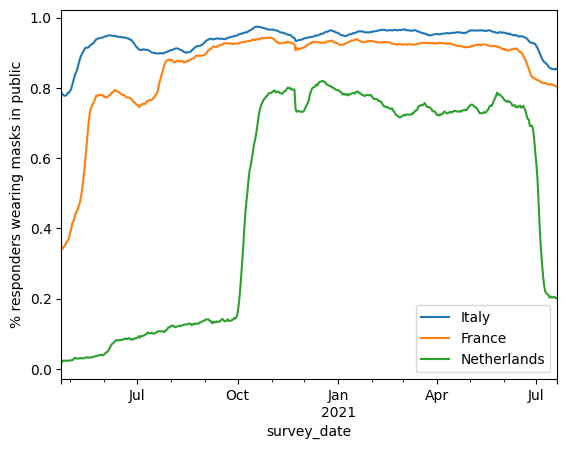

In [6]:
ax = df_IT.plot(x="survey_date", y="smoothed_mc",label="Italy")
df_FR.plot(x="survey_date", y="smoothed_mc", ax=ax,label="France")
df_NL.plot(x="survey_date", y="smoothed_mc", ax=ax,label="Netherlands")
ax.set_ylabel("% responders wearing masks in public")

### Daily data

In [7]:
response3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=daily&country=Italy&daterange=20200423-20210720").text

jsonData3 = json.loads(response3)

df_IT_daily = pd.DataFrame.from_dict(jsonData3['data'])

df_IT_daily["survey_date"] = pd.to_datetime(df_IT_daily['survey_date'])


In [8]:
#df_IT_daily

Text(0, 0.5, '% responders wearing masks in public')

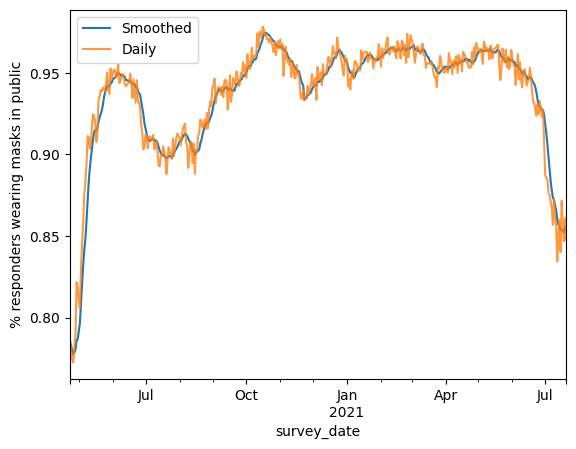

In [8]:
ax = df_IT.plot(x="survey_date", y="smoothed_mc",label="Smoothed")
df_IT_daily.plot(x="survey_date", y="percent_mc",ax=ax, label="Daily",alpha=0.8)
ax.set_ylabel("% responders wearing masks in public")

## Regional data (Italy)

In [9]:
response_reg1 = json.loads(requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=smoothed&country=Italy&region=Piemonte&daterange=20200423-20210720").text)
response_reg2 = json.loads(requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=smoothed&country=Italy&region=Lombardia&daterange=20200423-20210720").text)
response_reg3 = json.loads(requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=smoothed&country=Italy&region=Lazio&daterange=20200423-20210720").text)
response_reg4 = json.loads(requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=smoothed&country=Italy&region=Sicilia&daterange=20200423-20210720").text)
response_reg5 = json.loads(requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=smoothed&country=Italy&region=Campania&daterange=20200423-20210720").text)

df_reg1 = pd.DataFrame.from_dict(response_reg1['data'])
df_reg2 = pd.DataFrame.from_dict(response_reg2['data'])
df_reg3 = pd.DataFrame.from_dict(response_reg3['data'])
df_reg4 = pd.DataFrame.from_dict(response_reg4['data'])
df_reg5 = pd.DataFrame.from_dict(response_reg5['data'])

df_reg1["survey_date"] = pd.to_datetime(df_reg1['survey_date'])
df_reg2["survey_date"] = pd.to_datetime(df_reg2['survey_date'])
df_reg3["survey_date"] = pd.to_datetime(df_reg3['survey_date'])
df_reg4["survey_date"] = pd.to_datetime(df_reg4['survey_date'])
df_reg5["survey_date"] = pd.to_datetime(df_reg5['survey_date'])


Text(0, 0.5, '% responders wearing masks in public')

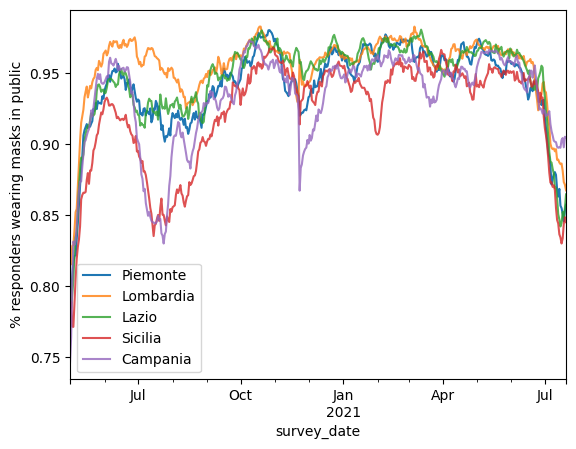

In [10]:
ax = df_reg1.plot(x="survey_date", y="smoothed_mc",label="Piemonte")
df_reg2.plot(x="survey_date", y="smoothed_mc",ax=ax, label="Lombardia",alpha=0.8)
df_reg3.plot(x="survey_date", y="smoothed_mc",ax=ax, label="Lazio",alpha=0.8)
df_reg4.plot(x="survey_date", y="smoothed_mc",ax=ax, label="Sicilia",alpha=0.8)
df_reg5.plot(x="survey_date", y="smoothed_mc",ax=ax, label="Campania",alpha=0.8)
ax.set_ylabel("% responders wearing masks in public")

Text(0, 0.5, 'Sample size')

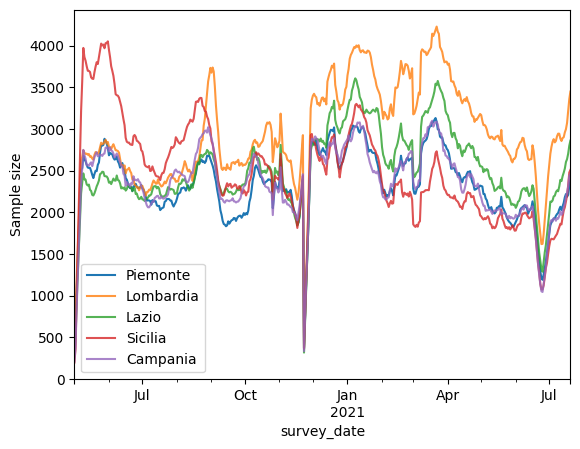

In [11]:
ax = df_reg1.plot(x="survey_date", y="sample_size",label="Piemonte")
df_reg2.plot(x="survey_date", y="sample_size",ax=ax, label="Lombardia",alpha=0.8)
df_reg3.plot(x="survey_date", y="sample_size",ax=ax, label="Lazio",alpha=0.8)
df_reg4.plot(x="survey_date", y="sample_size",ax=ax, label="Sicilia",alpha=0.8)
df_reg5.plot(x="survey_date", y="sample_size",ax=ax, label="Campania",alpha=0.8)
ax.set_ylabel("Sample size")